In [1]:
import pandas as pd
import numpy as np

tsv_file='..//data//NSDUH_2017.tsv'
csv_table=pd.read_table(tsv_file,sep='\t', low_memory=False)

In [2]:
#csv_table.to_csv('nsduh_backup.csv',index=False)
csv_table.head()
main_data = csv_table

In [3]:
categories_file = '..//data//categories.csv'
categories = pd.read_csv(categories_file, sep=';')
categories.head()

,Category,Column,Description,Flag
0,INTERVIEW INFORMATION,QUESTID2,RESPONDENT IDENTIFICATION,DELETE
1,INTERVIEW INFORMATION,FILEDATE,CREATION DATE OF THE DATA,DELETE
2,SUBSTANCE USE,CIGEVER,EVER SMOKED A CIGARETTE,GOOD
3,SUBSTANCE USE,CIGOFRSM,"IF BEST FRIEND OFFERED, WOULD YOU SMOKE CIG",GOOD
4,SUBSTANCE USE,CIGWILYR,DO YOU THINK YOU'LL SMOKE CIG IN NEXT 12 MOS,GOOD


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [98]:
good_categories = categories.loc[categories.Flag == 'GOOD']
pivot_columns = good_categories.Category.unique()
categories_count = good_categories.groupby('Category').count()

In [99]:
pv_col_list = list(pivot_columns)
pv_col_list

['SUBSTANCE USE ',
 'DRUG USE ',
 'DRUG TREATMENT ',
 'RISK/AVAILABILITY ',
 'SUBSTANCE DEPENDENCE AND ABUSE ',
 'CRIMINAL HISTORY',
 'HEALTH ',
 'MENTAL HEALTH ',
 'ENVIRONMENT',
 'YOUTH EXPERIENCES ',
 'INTERVIEW INFORMATION ',
 'DEMOGRAPHICS ']

In [100]:
categories_count = categories_count['Column']

In [101]:
categories_count

Category
CRIMINAL HISTORY                    35
DEMOGRAPHICS                        42
DRUG TREATMENT                     379
DRUG USE                           537
ENVIRONMENT                        103
HEALTH                              68
INTERVIEW INFORMATION                4
MENTAL HEALTH                      633
RISK/AVAILABILITY                   38
SUBSTANCE DEPENDENCE AND ABUSE     341
SUBSTANCE USE                      204
YOUTH EXPERIENCES                  108
Name: Column, dtype: int64

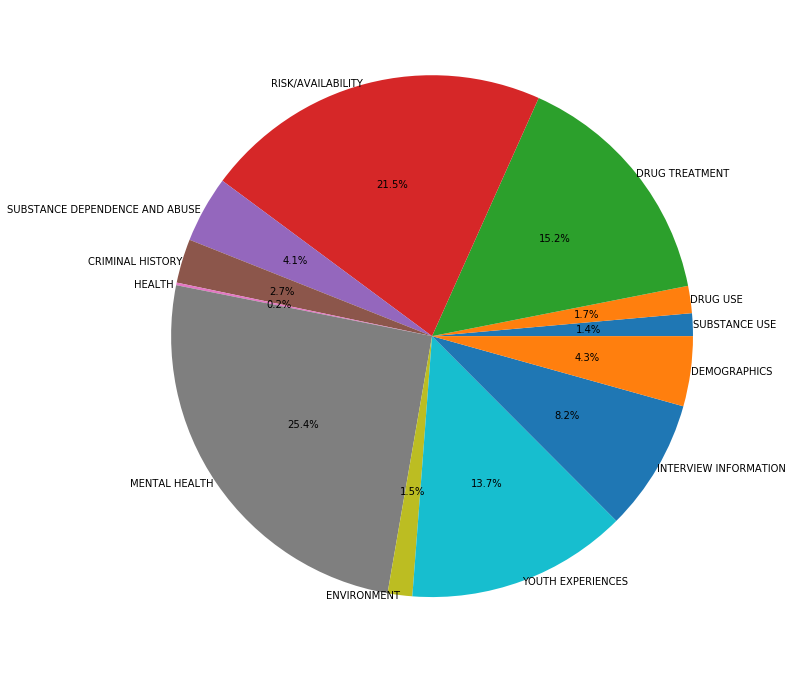

In [135]:
plt.hist(categories_count)
plt.pie(categories_count, labels=labels, autopct='%1.1f%%', shadow=False, labeldistance=1)
# plt.legend(patches, labels, loc="best")
fig = plt.gcf()
fig.set_size_inches(12,12)
# plt.tight_layout()
plt.show()

In [137]:
main_data.head()

,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,55235143,10/09/2018,1,99,99,13,9999,99,4,93,...,3.0,2,2,1,1,2,2,11203.888954,40043,1
1,13435143,10/09/2018,1,99,99,15,9999,99,1,18,...,3.0,1,2,1,1,2,2,9496.462244,40006,2
2,81345143,10/09/2018,1,99,99,14,9999,99,1,10,...,3.0,2,2,1,1,2,2,2943.702802,40030,2
3,53955143,10/09/2018,1,99,99,16,9999,99,4,93,...,3.0,2,2,2,2,2,2,1783.702549,40026,2
4,51775143,10/09/2018,2,99,99,991,9991,91,91,91,...,3.0,1,1,1,1,2,2,31528.749357,40029,1


In [138]:
delete_categories = categories.loc[categories.Flag == 'DELETE']
delete_categories
delete_categories_column = delete_categories['Column']
delete_categories_list = delete_categories_column.values.tolist()
delete_categories_list

['QUESTID2',
 'FILEDATE',
 'IICIGRC',
 'II2CIGRC',
 'IICGRRC',
 'II2CGRRC',
 'IIPIPLF',
 'IIPIPMN',
 'IISMKLSSREC',
 'IIALCRC',
 'II2ALCRC',
 'IIMJRC',
 'II2MJRC',
 'IICOCRC',
 'II2COCRC',
 'IICRKRC',
 'II2CRKRC',
 'IIHERRC',
 'II2HERRC',
 'IIHALLUCREC',
 'IILSDRC',
 'II2LSDRC',
 'IIPCPRC',
 'II2PCPRC',
 'IIECSTMOREC',
 'IIKETMINREC',
 'IIDAMTFXREC',
 'IISALVIAREC',
 'IIINHALREC',
 'IIMETHAMREC',
 'IIPNRANYREC',
 'IIOXCNANYYR',
 'IITRQANYREC',
 'IISTMANYREC',
 'IISEDANYREC',
 'IIPNRNMREC',
 'IIOXCNNMYR',
 'IITRQNMREC',
 'IISTMNMREC',
 'IISEDNMREC',
 'IIALCFY',
 'II2ALCFY',
 'IIMJFY',
 'II2MJFY',
 'IICOCFY',
 'II2COCFY',
 'IICRKFY',
 'II2CRKFY',
 'IIHERFY',
 'II2HERFY',
 'IIHALLUCYFQ',
 'IIINHALYFQ',
 'IIMETHAMYFQ',
 'IICIGFM',
 'II2CIGFM',
 'IICGRFM',
 'II2CGRFM',
 'IISMKLSS30N',
 'IIALCFM',
 'II2ALCFM',
 'IIALCBNG30D',
 'IIMJFM',
 'II2MJFM',
 'IICOCFM',
 'II2COCFM',
 'IICRKFM',
 'II2CRKFM',
 'IIHERFM',
 'II2HERFM',
 'IIHALLUC30N',
 'IIINHAL30N',
 'IIMETHAM30N',
 'IIPNRNM30FQ',
 'IITRQ

In [139]:
good_main_data = main_data.drop(columns=delete_categories_list)
good_main_data.head()

,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,IRFAMIN3,GOVTPROG,INCOME,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102
0,1,99,99,13,9999,99,4,93,93,93,...,7,2,4,3.0,2,2,1,1,2,2
1,1,99,99,15,9999,99,1,18,99,4,...,4,2,2,3.0,1,2,1,1,2,2
2,1,99,99,14,9999,99,1,10,99,3,...,7,2,4,3.0,2,2,1,1,2,2
3,1,99,99,16,9999,99,4,93,93,93,...,7,2,4,3.0,2,2,2,2,2,2
4,2,99,99,991,9991,91,91,91,91,91,...,5,2,2,3.0,1,1,1,1,2,2


In [140]:
good_main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56276 entries, 0 to 56275
Columns: 2492 entries, CIGEVER to AIIND102
dtypes: float64(406), int64(2086)
memory usage: 1.0 GB


In [9]:
#good_main_data.to_csv('..\\data\\nsduh_clean.csv',index=False)

In [141]:
nulls_in_columns = good_main_data.isnull().any()
nulls_in_columns

CIGEVER      False
CIGOFRSM     False
CIGWILYR     False
CIGTRY       False
CIGYFU       False
CIGMFU       False
CIGREC       False
CIG30USE     False
CG30EST      False
CIG30AV      False
CIG30BR2     False
CIG30TPE     False
CIG30MEN     False
CIG30MLN     False
CIG30RO2     False
CIGDLYMO     False
CIGAGE       False
CIGDLYFU     False
CIGDLMFU     False
CIG100LF     False
SMKLSSEVR    False
SMKLSSTRY    False
SMKLSSYFU    False
SMKLSSMFU    False
SMKLSSREC    False
SMKLSS30N    False
SMKLSS30E    False
CIGAREVR     False
CIGARTRY     False
CIGARYFU     False
             ...  
HLNVSOR      False
IRMCDCHP     False
IRMEDICR     False
IRCHMPUS     False
IRPRVHLT     False
IROTHHLT     False
HLCALLFG     False
HLCALL99     False
ANYHLTI2     False
IRINSUR4     False
OTHINS       False
CELLWRKNG    False
CELLNOTCL    False
IRFAMSOC     False
IRFAMSSI     False
IRFSTAMP     False
IRFAMPMT     False
IRFAMSVC     False
IRWELMOS     False
IRPINC3      False
IRFAMIN3     False
GOVTPROG    

In [142]:
rows_nan = good_main_data.isnull().sum(axis = 1)
rows_nan_count = len([i for i in rows_nan if i != 0])
rows_nan_count

56276

Most of rows have NaNs

In [143]:
columns_nan = good_main_data.isnull().sum(axis = 0)
columns_nan_count = len([(x, i) for x, i in enumerate(columns_nan) if i != 0])
columns_nan_count

376

The dataset has 376 columns which contains NaN values. Delete all columns with more than 10% NaNs which is the ones with more than 5628 NaNs. It'll be 310 columns. The rest 66 of them will be replaced with most common value in that column.

In [144]:
columns_nan_count = len([(x, i) for x, i in enumerate(columns_nan) if i >= 5628])
columns_nan_count

310

In [145]:
columns_nan_list = [x for x, i in enumerate(columns_nan) if i >= 5628]
columns_nan_list

[636,
 637,
 638,
 639,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 1085,
 1461,
 1462,
 1463,
 1464,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1626,
 1627,
 1628,
 1629,
 1630,
 1631,
 1632,
 1633,
 1634,
 1635,
 1636,
 1637,
 1638,
 1639,
 1640,
 1641,
 1642,
 1643,
 1644,
 1645,
 1646,
 1647,
 1648,
 1649,
 1650,
 1651,
 1652,
 1653,
 1654,
 1655,
 1656,
 1657,
 1658,
 1659,
 1660,
 1661,
 1662,
 1663,
 1664,
 1665,
 1666,
 1667,
 1668,
 1669,
 1670,
 1740,
 1741,
 1742,
 1743,
 1744,
 1745,
 1746,
 1747,
 1748,
 1749,
 1750,
 1751,
 1752,
 1753,
 1754,
 1755,
 1756,
 1757,
 1758,
 1759,
 1760,
 1761,
 1762,
 1763,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1770,
 1771,
 1772,
 1773,
 1774,
 1775,
 1776,
 1777,
 1778,
 1779,
 1780,
 1781,
 1782,
 1783,
 1784,
 1785,
 1786,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 

In [146]:
without_nan_main_data = good_main_data.drop(good_main_data.columns[columns_nan_list],axis=1)

In [147]:
without_nan_main_data.head()

,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,IRFAMIN3,GOVTPROG,INCOME,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102
0,1,99,99,13,9999,99,4,93,93,93,...,7,2,4,3.0,2,2,1,1,2,2
1,1,99,99,15,9999,99,1,18,99,4,...,4,2,2,3.0,1,2,1,1,2,2
2,1,99,99,14,9999,99,1,10,99,3,...,7,2,4,3.0,2,2,1,1,2,2
3,1,99,99,16,9999,99,4,93,93,93,...,7,2,4,3.0,2,2,2,2,2,2
4,2,99,99,991,9991,91,91,91,91,91,...,5,2,2,3.0,1,1,1,1,2,2


In [148]:
columns_nan_check = without_nan_main_data.isnull().sum(axis = 0)
columns_nan_count_check = len([(x, i) for x, i in enumerate(columns_nan_check) if i != 0])
columns_nan_count_check

66

In [149]:
replace_nan_data = without_nan_main_data.fillna(without_nan_main_data.mode().iloc[0])
replace_nan_data.head()

,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,IRFAMIN3,GOVTPROG,INCOME,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102
0,1,99,99,13,9999,99,4,93,93,93,...,7,2,4,3.0,2,2,1,1,2,2
1,1,99,99,15,9999,99,1,18,99,4,...,4,2,2,3.0,1,2,1,1,2,2
2,1,99,99,14,9999,99,1,10,99,3,...,7,2,4,3.0,2,2,1,1,2,2
3,1,99,99,16,9999,99,4,93,93,93,...,7,2,4,3.0,2,2,2,2,2,2
4,2,99,99,991,9991,91,91,91,91,91,...,5,2,2,3.0,1,1,1,1,2,2


In [150]:
replace_nan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56276 entries, 0 to 56275
Columns: 2182 entries, CIGEVER to AIIND102
dtypes: float64(96), int64(2086)
memory usage: 936.8 MB


In [151]:
columns_nan_check1 = replace_nan_data.isnull().sum(axis = 0)
columns_nan_count_check1 = len([(x, i) for x, i in enumerate(columns_nan_check1) if i == 0])
columns_nan_count_check1

2182

In [163]:
new_columns = list(replace_nan_data.columns)
new_columns

['CIGEVER',
 'CIGOFRSM',
 'CIGWILYR',
 'CIGTRY',
 'CIGYFU',
 'CIGMFU',
 'CIGREC',
 'CIG30USE',
 'CG30EST',
 'CIG30AV',
 'CIG30BR2',
 'CIG30TPE',
 'CIG30MEN',
 'CIG30MLN',
 'CIG30RO2',
 'CIGDLYMO',
 'CIGAGE',
 'CIGDLYFU',
 'CIGDLMFU',
 'CIG100LF',
 'SMKLSSEVR',
 'SMKLSSTRY',
 'SMKLSSYFU',
 'SMKLSSMFU',
 'SMKLSSREC',
 'SMKLSS30N',
 'SMKLSS30E',
 'CIGAREVR',
 'CIGARTRY',
 'CIGARYFU',
 'CIGARMFU',
 'CIGARREC',
 'CGR30USE',
 'CI30EST',
 'CGR30BR2',
 'PIPEVER',
 'PIPE30DY',
 'ALCEVER',
 'ALCTRY',
 'ALCYFU',
 'ALCMFU',
 'ALCREC',
 'ALCYRTOT',
 'ALTOTFG',
 'ALFQFLG',
 'ALBSTWAY',
 'ALDAYPYR',
 'ALDAYPMO',
 'ALDAYPWK',
 'ALCDAYS',
 'AL30EST',
 'ALDYSFG',
 'ALCUS30D',
 'ALCBNG30D',
 'MJEVER',
 'MJAGE',
 'MJYFU',
 'MJMFU',
 'MJREC',
 'MJYRTOT',
 'MRTOTFG',
 'MJFQFLG',
 'MRBSTWAY',
 'MRDAYPYR',
 'MRDAYPMO',
 'MRDAYPWK',
 'MJDAY30A',
 'MR30EST',
 'COCEVER',
 'COCAGE',
 'COCYFU',
 'COCMFU',
 'COCREC',
 'COCYRTOT',
 'CCTOTFG',
 'CCFQFLG',
 'CCBSTWAY',
 'CCDAYPYR',
 'CCDAYPMO',
 'CCDAYPWK',
 'COCUS30A

In [164]:
# new_categories = categories.loc[categories.Column = [new_columns]]
pivot_new_columns = new_categories.Category.unique()
new_categories_count = new_categories.groupby('Category').count()

SyntaxError: invalid syntax (<ipython-input-164-4de68f0aed57>, line 1)

In [21]:
# plot of category % after na handled
plt.pie(categories_count, labels=labels, autopct='%1.1f%%', shadow=False, labeldistance=1)
# plt.legend(patches, labels, loc="best")
fig = plt.gcf()
fig.set_size_inches(12,12)
# plt.tight_layout()
plt.show()

In [22]:
replace_nan_data.to_csv('..\\data\\nsduh_clean.csv',index=False)

In [23]:
# replace_nan_data['CRDAYPMO']